In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

from population_class import Population
from landscape_dataset_fitness import CellDiff_Dataset_Landscape
from module_class import Node
from morphogen_regimes import *
from landscape_visuals import *
from helper_functions import plot_cell_proportions, get_cell_data

%load_ext autoreload

save_dir = 'saved_files/'

In [2]:
day = 2.    # Hyperparemeter - duration between timepoints (half a day in fact)

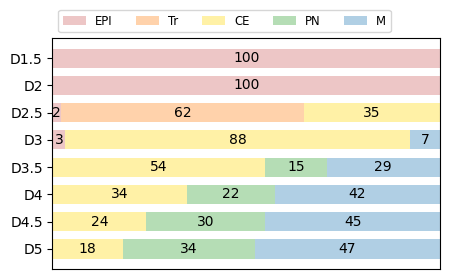

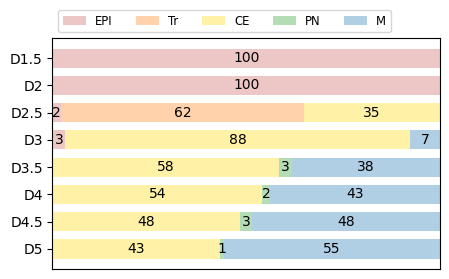

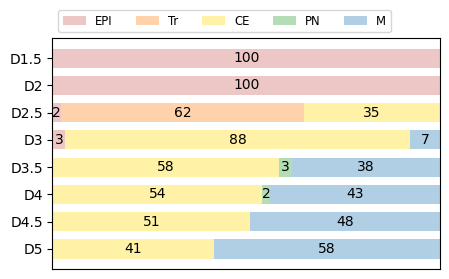

In [3]:
#  Loading the dataset of 3 experiments 
filenames = ('Ch2-5_FGF0-3.txt', 'Ch2-5_FGF0-4.txt', 'Ch2-5_FGF0-5.txt')
cell_dataset = []
for filename in filenames:
    cell_data = get_cell_data(filename)
    cell_data = np.insert(cell_data, 0, cell_data[0], axis = 0) ## s
    col_labels = ['EPI', 'Tr', 'CE', 'PN', 'M']
    row_labels = ['D1.5', 'D2', 'D2.5', 'D3', 'D3.5', 'D4', 'D4.5', 'D5']
    col_colors = ['indianred', 'tab:orange', 'gold', 'tab:green', 'tab:blue']

    for row in cell_data:
        row *= 1./np.sum(row)   # rescale everything to sum up to 1

    cell_dataset.append(cell_data)
    plot_cell_proportions(cell_data, col_labels, col_colors, row_labels)

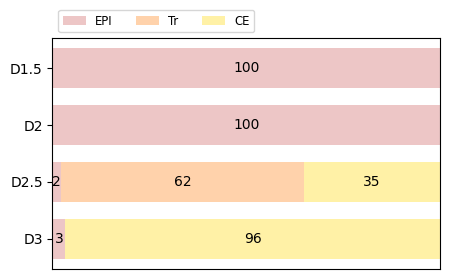

In [4]:
#  Make a subset of data: first 4 timepoints and 3 cell states 
filename = 'Ch2-5_FGF0-3.txt'
cell_data = get_cell_data(filename)
cell_data = np.insert(cell_data, 0, cell_data[0], axis = 0) ## s
col_labels = ['EPI', 'Tr', 'CE', 'PN', 'M']
col_colors = ['indianred', 'tab:orange', 'gold', 'tab:green', 'tab:blue']

cell_data_4  = cell_data[:4]
row_labels_4 = ['D1.5', 'D2', 'D2.5', 'D3']
cell_data_4[-1, 2] = 87
cell_data_4[-1, -1] = 0
cell_data_4 = cell_data_4[:, :3]
col_labels_4 = col_labels[:3]

for row in cell_data_4:
    row *= 1./np.sum(row)

plot_cell_proportions(cell_data_4, col_labels_4, col_colors, row_labels_4)
cell_dataset_0 = (cell_data_4,)

In [5]:
# Set up for optimizing the first 4 timepoints 

time_pars_0 = (0., day*3, 4)
morphogen_times_0 = ((day*1, day*3),)   # Signal is changing at timepoint 1 and timepoint 3 

par_limits = {
    'x': (-2.,2.),
    'y': (-2., 2.),
    'a': (0.,4.),
    's': (0.1, 1.5),
}

par_choice_values = {}

landscape_pars_celldiff = {
    'A0': 0.005,
    'init_cond': (0., 0.),
    'regime': mr_piecewise,
    'n_regimes': 3, # !
    'morphogen_times': morphogen_times_0[0],
    'used_fp_types': [Node],
    'immutable_pars_list': [],
}

prob_pars_celldiff = {
    'prob_add': 0.,
    'prob_drop': 0.,
    'prob_shuffle': 0.
}


fitness_pars_celldiff = {
    'ncells': 300, #
    'cell_data': cell_dataset_0,
    'init_state': 0,
    'attractor_states': (2,),   
    'non_attractor_states': (),
    'noise': 0.1,
    'penalty_weight': .1,
    'time_pars': time_pars_0,
    'morphogen_times': morphogen_times_0,
    'ndt': 50,    # integration steps per time point
}
#  'ndt' largely controls computing time (but 50 might be too small in fact)


Landscape with modules:
Node at (1.35007, -1.51438), a = [0.40809 2.517   2.19188], s = [0.97114 0.25085 0.38074],
Node at (-0.28343, 1.61494), a = [2.91064 2.97082 2.10862], s = [0.55622 1.358   0.31786],
Node at (-1.54786, 1.94431), a = [2.87384 3.40072 1.68182], s = [1.21278 1.47456 1.16804]


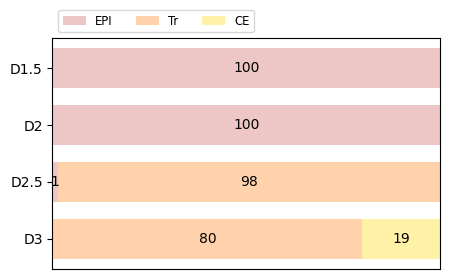

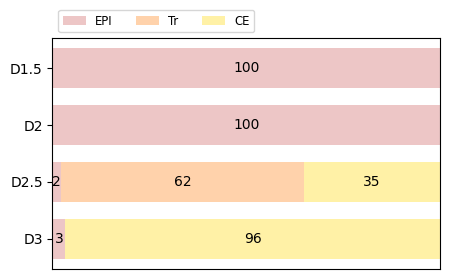

In [11]:
# Set up population 
# Start with 3 modules (red, orange, yellow)
start_module_list = [random.choice(landscape_pars_celldiff['used_fp_types']).generate(par_limits, par_choice_values,
                                                                                      n_regimes=landscape_pars_celldiff[
                                                                                          'n_regimes']) for i in
                     range(cell_dataset_0[0].shape[1])]

start_module_list[2].par_limits = {'x': (-1.,1.), 'y': (-1., 1.)}  # Constrain yellow to be around the center 


N = 16   # Even number - adjust to your computing capacity
P = Population(N, CellDiff_Dataset_Landscape, landscape_pars_celldiff, prob_pars_celldiff,
               fitness_pars_celldiff, par_limits, par_choice_values,
               start_module_list=start_module_list)
print(P.landscape_list[0])

plot_cell_proportions(P.landscape_list[0].result[0], col_labels_4, col_colors, row_labels_4)   # result from initial random landscape
plot_cell_proportions(cell_data_4, col_labels_4, col_colors, row_labels_4)

Timecode: 20240612-174735


/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: invalid value encountered in multiply
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: invalid value encountered in multiply
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * n

Best fitness: -0.03376049692879729
CPU times: user 244 ms, sys: 88 ms, total: 332 ms
Wall time: 11.1 s
Done


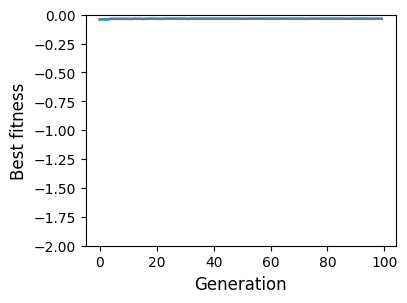

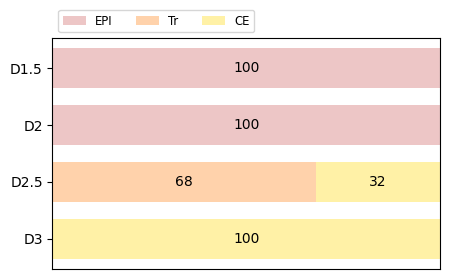

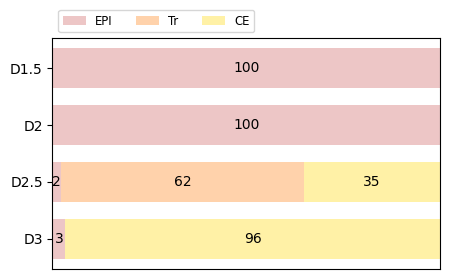

In [12]:
%time fitness_traj = P.evolve_parallel(100, fitness_pars_celldiff, save_dir, save_each=10)
print('Done')

plt.figure(figsize=(4,3))
plt.plot(fitness_traj, lw=2, c='steelblue')
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best fitness', fontsize=12)
plt.ylim((-2,0))
plt.show()

#  Plot result Vs target proportions
plot_cell_proportions(P.landscape_list[0].result[0], col_labels_4, col_colors, row_labels_4)
plot_cell_proportions(cell_data_4, col_labels_4, col_colors, row_labels_4)

Landscape with modules:
Node at (-0.86901, -1.51438), a = [0.40809 3.00414 1.9811 ], s = [0.97114 0.25085 0.38074],
Node at (-0.28343, 0.21567), a = [1.07763 2.97082 2.27636], s = [0.36697 1.358   0.31786],
Node at (0.38942, 1.94431), a = [2.87384 3.40072 2.42225], s = [0.68917 1.47456 0.6722 ]


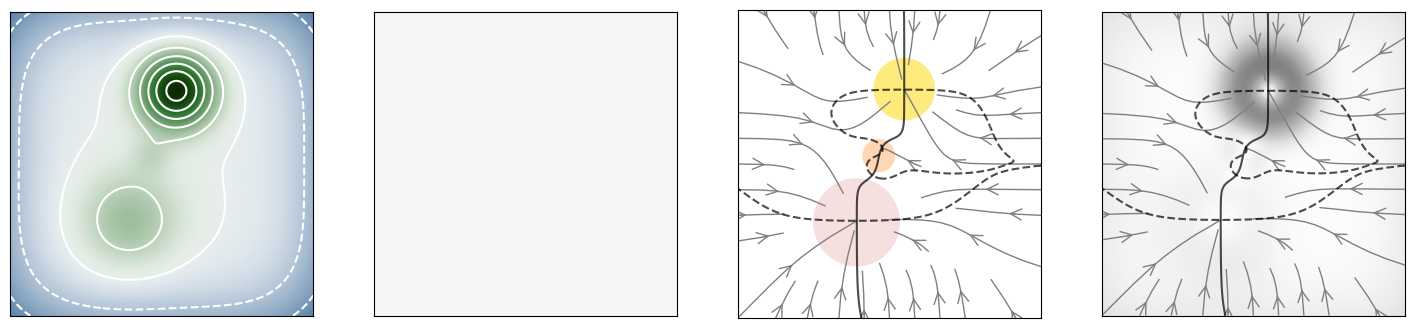

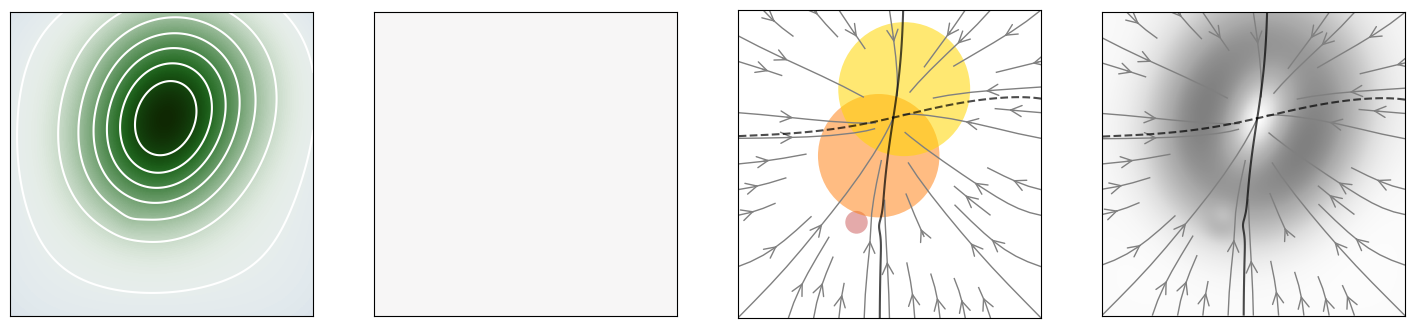

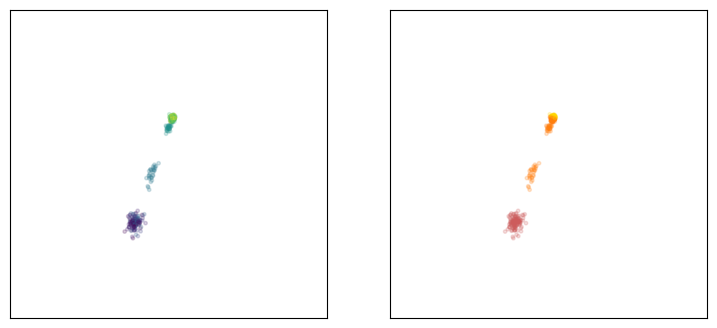

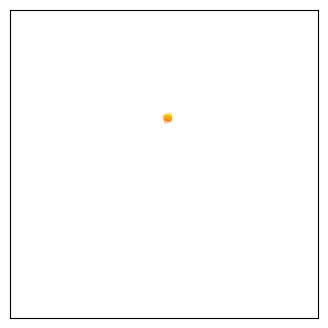

In [22]:
landscape = P.landscape_list[0]
print(landscape)

L = 4.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
times = np.array((0., day*1.1))
dX, dY = visualize_all(landscape, xx, yy, times, density=0.45, plot_traj=False, color_scheme='order')

landscape.morphogen_times = fitness_pars_celldiff['morphogen_times'][0]
n = 30
landscape.init_cells(n, 0, 0.1)
get_and_plot_traj(landscape, 0, day*3, 11, L, 0.1, frozen=False)
plot_cells(landscape, L)


In [23]:
# Set up for the full optimization 
# To each landscape, add two randomly generated modules (green and blue)
# (Do not run this cell more than once)

par_limits = {
    'x': (-4.,4.),
    'y': (-4., 4.),
    'a': (0.,4.),
    's': (0.1, 1.5),
}

P.par_limits = par_limits


for landscape in P.landscape_list:
    start_module_list = landscape.module_list
    start_module_list.append(random.choice(landscape_pars_celldiff['used_fp_types']).generate(par_limits,
                                                                                              par_choice_values,
                                                                                              n_regimes=
                                                                                              landscape_pars_celldiff[
                                                                                                  'n_regimes']))
    start_module_list.append(random.choice(landscape_pars_celldiff['used_fp_types']).generate(par_limits,
                                                                                              par_choice_values,
                                                                                              n_regimes=
                                                                                              landscape_pars_celldiff[
                                                                                                  'n_regimes']))

# Reset fitness 
for landscape in P.landscape_list:
    landscape.fitness = -np.inf

In [24]:
time_pars = (0., day*7, 8)

#   2 morphogen changing times for each of the 3 experiments 
morphogen_times = ((day*1, day*3), (day*1, day*5), (day*1, day*7))


fitness_pars_celldiff = {
    'ncells': 300, #
    'cell_data': cell_dataset,  # full dataset 
    'init_state': 0,
    'attractor_states': (),
    'non_attractor_states': (),
    'noise': 0.1,
    'penalty_weight': 0.,
    'time_pars': time_pars,
    'morphogen_times': morphogen_times,
    'ndt': 50,
}

Timecode: 20240612-175224


/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: invalid value encountered in multiply
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: invalid value encountered in multiply
  kl = np.sum(np.where(target != 0., target * np.log(target / result_smoothed), 0.))
/Users/victoria/Code/landscapes/src/landscapes/helper_functions.py:22: RuntimeWarning: divide by zero encountered in log
  kl = np.sum(np.where(target != 0., target * n

Best fitness: -0.4278708089964359
CPU times: user 937 ms, sys: 238 ms, total: 1.18 s
Wall time: 1min 30s
Done


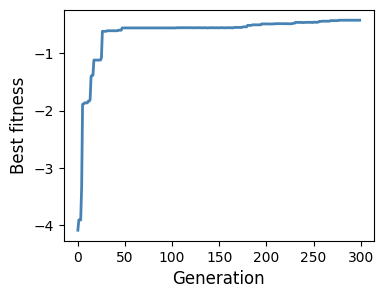

Ch2-5_FGF0-3.txt


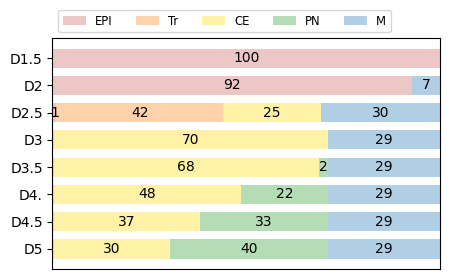

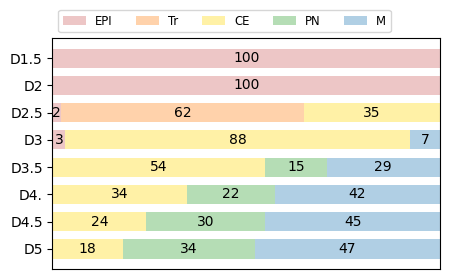

Ch2-5_FGF0-4.txt


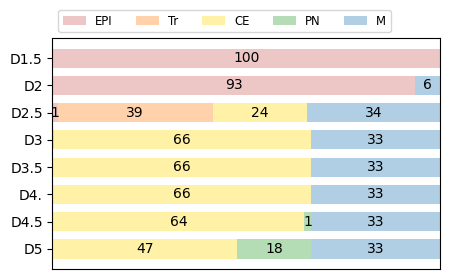

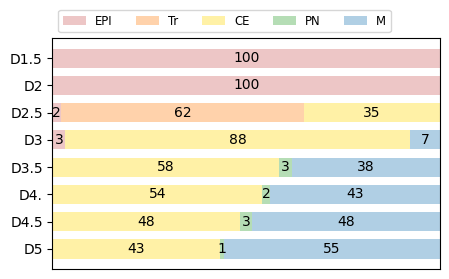

Ch2-5_FGF0-5.txt


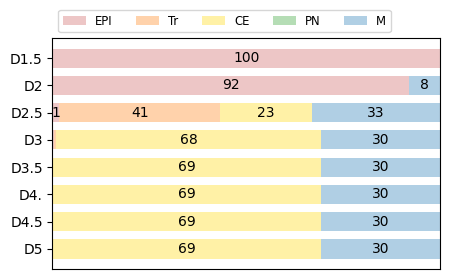

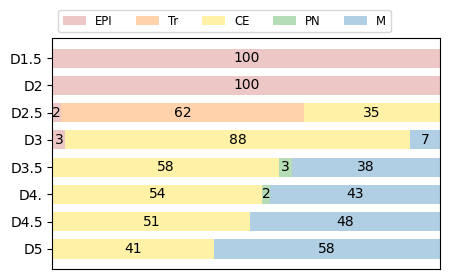

In [25]:
%time fitness_traj = P.evolve_parallel(300, fitness_pars_celldiff, save_dir, save_each=10)
print('Done')

plt.figure(figsize=(4,3))
plt.plot(fitness_traj, lw=2, c='steelblue')
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best fitness', fontsize=12)
plt.show()

for k in range(len(cell_dataset)):
    print(filenames[k])
    plot_cell_proportions(P.landscape_list[0].result[k], col_labels, col_colors, row_labels=None)   # result 
    plot_cell_proportions(cell_dataset[k], col_labels, col_colors, row_labels=None)                 # target 

Landscape with modules:
Node at (-0.86901, -1.51438), a = [0.40809 0.14621 2.19856], s = [1.29067 0.89734 0.61691],
Node at (-0.28343, 0.21567), a = [0.01823 2.97082 2.27636], s = [1.24908 1.358   0.73159],
Node at (0.87328, 1.94431), a = [0.23818 3.40072 2.42225], s = [0.7974  1.32344 0.6722 ],
Node at (-1.33603, 2.64841), a = [2.4544  3.87    1.48751], s = [0.58719 0.96755 1.23688],
Node at (1.09056, -2.54906), a = [1.07756 3.77473 3.57352], s = [1.18577 0.99857 0.93295]


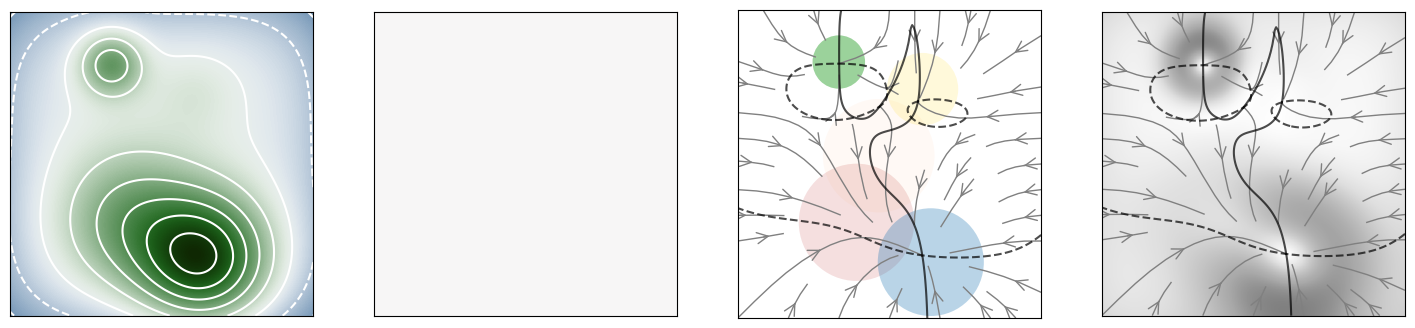

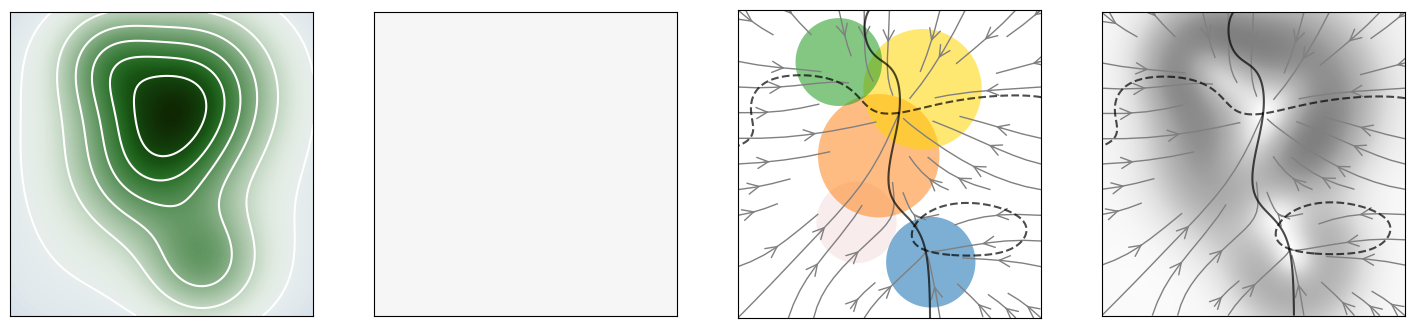

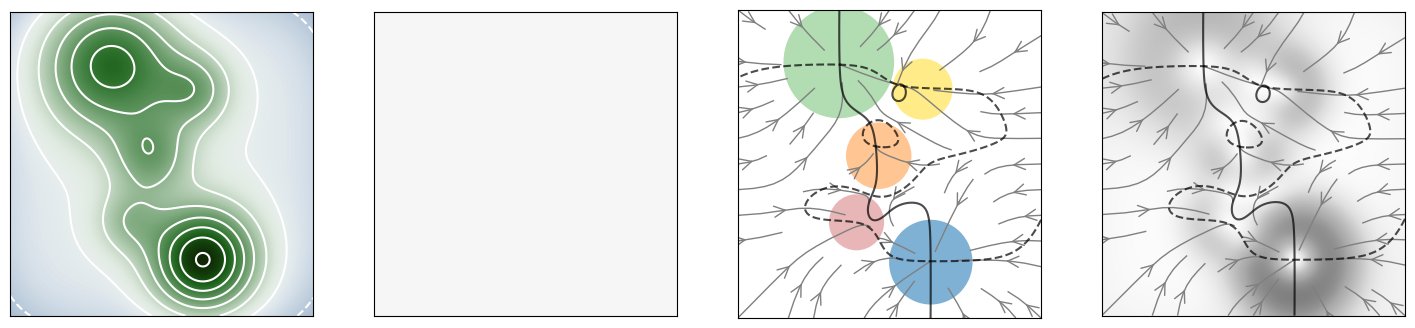

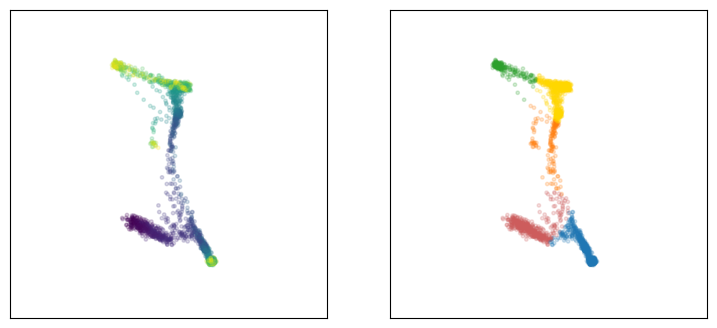

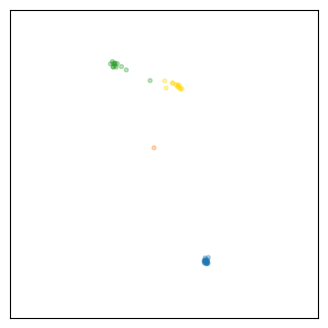

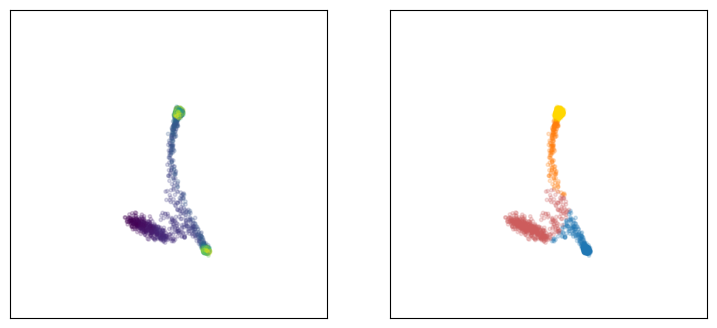

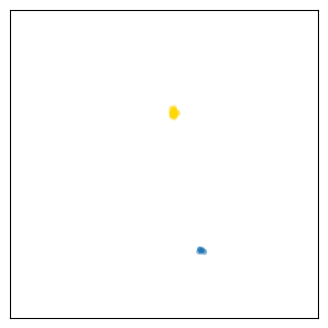

In [26]:
landscape = P.landscape_list[0]
print(landscape)

L = 4.
npoints = 201
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')
times = np.array((0., day*2, day*10))
dX, dY = visualize_all(landscape, xx, yy, times, density=0.45, plot_traj=False, color_scheme='order')

#  Plot trajectories of the first experiment 
landscape.morphogen_times = fitness_pars_celldiff['morphogen_times'][0]
n = 50
landscape.init_cells(n, 0, 0.1)
get_and_plot_traj(landscape, 0, day*7, 51, L, 0.1, frozen=False, colors=['indianred', 'tab:orange', 'gold','tab:green', 'tab:blue', 'grey'])
plot_cells(landscape, L)

#  Plot trajectories of the third experiment 
landscape.morphogen_times = fitness_pars_celldiff['morphogen_times'][2]
n = 50
landscape.init_cells(n, 0, 0.1)
get_and_plot_traj(landscape, 0, day*7, 51, L, 0.1, frozen=False, colors=['indianred', 'tab:orange', 'gold','tab:green', 'tab:blue', 'grey'])
plot_cells(landscape, L)

In [ ]:
#   Can do another run of optimization with updated fitness parameters 
#   I.e. edd penalty on cell state stability (0, 3, 4 should be attractors)

for landscape in P.landscape_list:
    landscape.fitness = -np.inf

fitness_pars_celldiff = {
    'ncells': 300, #
    'cell_data': cell_dataset,
    'init_state': 0,
    'attractor_states': (0, 3, 4),
    'non_attractor_states': (),
    'noise': 0.1,
    'penalty_weight': 0.5,
    'time_pars': time_pars,
    'morphogen_times': morphogen_times,
    'ndt': 50,
}

In [ ]:
%time fitness_traj = P.evolve_parallel(300, fitness_pars_celldiff, save_dir, save_each=10)
print('Done')

plt.figure(figsize=(4,3))
plt.plot(fitness_traj, lw=2, c='steelblue')
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Best fitness', fontsize=12)
plt.ylim((-4, 0.1))
plt.show()

for k in range(len(cell_dataset)):
    print(filenames[k])
    plot_cell_proportions(P.landscape_list[0].result[k], col_labels, col_colors, row_labels=None)
    plot_cell_proportions(cell_dataset[k], col_labels, col_colors, row_labels=None)